In [2]:
import pandas as pd
import numpy as np 

In [3]:
import os
from PIL import Image
from IPython.display import display  # Import the display function

In [4]:

# Correct path according to your environment
path_malignant = fr'C:\Users\MM\CBS PYTHON ÖVNINGAR\Github Repositorys\ML-DL-Final-Assignment\ML-DL-Final-Assignment\test\Malignant'
path_benign = fr'C:\Users\MM\CBS PYTHON ÖVNINGAR\Github Repositorys\ML-DL-Final-Assignment\ML-DL-Final-Assignment\test\Benign'

path_train_malignant = fr'C:\Users\MM\CBS PYTHON ÖVNINGAR\Github Repositorys\ML-DL-Final-Assignment\ML-DL-Final-Assignment\train\Malignant'
path_train_benign = fr'C:\Users\MM\CBS PYTHON ÖVNINGAR\Github Repositorys\ML-DL-Final-Assignment\ML-DL-Final-Assignment\train\Benign'

images = []
labels = []

# Function to load images from a directory
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Check if file is an image
            image_path = os.path.join(folder, filename)
            with Image.open(image_path) as image:  # Use 'with' to ensure files are closed after being opened
                images.append(image.copy())  # Use image.copy() to keep the image in memory after closing file
                labels.append(label)

# Load images and labels
load_images_from_folder(path_malignant, 'Malignant')
load_images_from_folder(path_benign, 'Benign')
load_images_from_folder(path_train_malignant, 'Malignant')
load_images_from_folder(path_train_benign, 'Benign')

# Create DataFrame
df = pd.DataFrame({
    'Image': images,
    'Label': labels
})




In [5]:
# Display the first few rows of the DataFrame
print(df)

                                                   Image      Label
0      <PIL.Image.Image image mode=RGB size=224x224 a...  Malignant
1      <PIL.Image.Image image mode=RGB size=224x224 a...  Malignant
2      <PIL.Image.Image image mode=RGB size=224x224 a...  Malignant
3      <PIL.Image.Image image mode=RGB size=224x224 a...  Malignant
4      <PIL.Image.Image image mode=RGB size=224x224 a...  Malignant
...                                                  ...        ...
13874  <PIL.Image.Image image mode=RGB size=224x224 a...     Benign
13875  <PIL.Image.Image image mode=RGB size=224x224 a...     Benign
13876  <PIL.Image.Image image mode=RGB size=224x224 a...     Benign
13877  <PIL.Image.Image image mode=RGB size=224x224 a...     Benign
13878  <PIL.Image.Image image mode=RGB size=224x224 a...     Benign

[13879 rows x 2 columns]


In [6]:
# Assuming 'images' and 'labels' lists are already filled with PIL Image objects and labels respectively
pixel_data = [np.array(image).flatten() for image in images]
pixel_df = pd.DataFrame({
    'Pixels': pixel_data,
    'Label': labels
})


In [7]:
# Display the first few rows of the DataFrame
print(pixel_df)

                                                  Pixels      Label
0      [143, 109, 100, 144, 110, 101, 145, 111, 102, ...  Malignant
1      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...  Malignant
2      [217, 210, 204, 217, 210, 204, 217, 210, 204, ...  Malignant
3      [4, 5, 0, 6, 7, 2, 9, 8, 4, 11, 10, 6, 16, 11,...  Malignant
4      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  Malignant
...                                                  ...        ...
13874  [126, 92, 91, 123, 89, 88, 126, 90, 90, 133, 9...     Benign
13875  [226, 130, 141, 226, 130, 141, 225, 129, 140, ...     Benign
13876  [242, 146, 158, 242, 146, 158, 241, 145, 157, ...     Benign
13877  [204, 158, 168, 203, 157, 167, 200, 154, 164, ...     Benign
13878  [240, 150, 175, 241, 151, 176, 245, 155, 180, ...     Benign

[13879 rows x 2 columns]


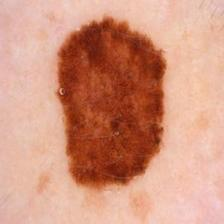

In [8]:
import numpy as np
from PIL import Image
from IPython.display import display  # Import the display function for Jupyter

# Assuming pixel_data contains the flattened pixel arrays and has been normalized to 0-1
# Convert the first image's pixel data back to an image

first_image_pixels = pixel_data[10] # Scale pixels back to 0-255 if they were normalized
first_image_pixels = first_image_pixels.astype(np.uint8)  # Ensure the type is uint8

# Reshape the pixel array to the dimensions of the original image
image_array = first_image_pixels.reshape(224, 224, 3)

# Create an image from the numpy array
image = Image.fromarray(image_array, 'RGB')

# Display the image in the notebook
display(image)

In [9]:
#So what I have done here is normalizing the data by dividing it by 255
#The issue is memory allocation, therefore I have done it batch by batch ( size 20)
#I also converted into float32 instead of float64, which means less decimals, this could
#affect the accuracy when segmenting, but lets at least try with this first
#and perhaps after we can find a way for allocating the memory in an efficient way


# Set the batch size to a value that suits your system's memory capacity
batch_size = 20

# Number of rows in your DataFrame
num_rows = len(pixel_df)

for start in range(0, num_rows, batch_size):
    end = min(start + batch_size, num_rows)  # Ensure we don't go past the end of the DataFrame
    # Convert batch to a NumPy array, assuming each row's 'Pixels' entry is already a list or an array
    batch_array = np.stack(pixel_df['Pixels'][start:end].values)

    # Convert to float32 before normalization
    batch_array = batch_array.astype(np.float32)
    
    # Normalize the batch
    normalized_batch = batch_array / 255.0
    
    # Convert each array back to a list and update the DataFrame
    pixel_df['Pixels'][start:end] = list(normalized_batch)

# Save or continue processing pixel_df as needed

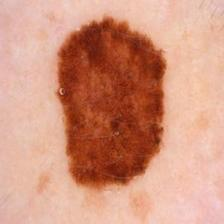

In [10]:
import numpy as np
from PIL import Image
from IPython.display import display  # Import the display function for Jupyter

# Assuming pixel_data contains the flattened pixel arrays and has been normalized to 0-1
# Convert the first image's pixel data back to an image

first_image_pixels = pixel_data[10] # Scale pixels back to 0-255 if they were normalized
first_image_pixels = first_image_pixels.astype(np.uint8)  # Ensure the type is uint8

# Reshape the pixel array to the dimensions of the original image
image_array = first_image_pixels.reshape(224, 224, 3)

# Create an image from the numpy array
image = Image.fromarray(image_array, 'RGB')

# Display the image in the notebook
display(image)

In [11]:
print(pixel_df)

                                                  Pixels      Label
0      [0.56078434, 0.42745098, 0.39215687, 0.5647059...  Malignant
1      [0.007843138, 0.007843138, 0.007843138, 0.0078...  Malignant
2      [0.8509804, 0.8235294, 0.8, 0.8509804, 0.82352...  Malignant
3      [0.015686275, 0.019607844, 0.0, 0.023529412, 0...  Malignant
4      [0.003921569, 0.003921569, 0.003921569, 0.0039...  Malignant
...                                                  ...        ...
13874  [0.49411765, 0.36078432, 0.35686275, 0.4823529...     Benign
13875  [0.8862745, 0.50980395, 0.5529412, 0.8862745, ...     Benign
13876  [0.9490196, 0.57254905, 0.61960787, 0.9490196,...     Benign
13877  [0.8, 0.61960787, 0.65882355, 0.79607844, 0.61...     Benign
13878  [0.9411765, 0.5882353, 0.6862745, 0.94509804, ...     Benign

[13879 rows x 2 columns]


**PRE_PROCESSING**


**ALL CODE BELOW IS GPT GAN SEGMENTATION; IT DIDNT WORK; THIS IS JUST TEST**


In [12]:

# Assuming each row in 'pixel_df' under 'Pixels' column is a flat array for a 256x256x3 image
def prepare_data(pixel_df):
    image_data = np.stack(pixel_df['Pixels'].apply(lambda x: x.reshape(224, 224, 3)))
    return image_data

# Prepare the images
images = prepare_data(pixel_df)


MemoryError: Unable to allocate 7.78 GiB for an array with shape (13879, 224, 224, 3) and data type float32

In [ ]:
pixel_df.shape

NameError: name 'pixel_df' is not defined